# Valle del Cauca Exports - EDA

## Dependencies

In [1]:
import os
import sys
import duckdb
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sys.path.append("/workspaces/talento_tech/ingest/")
import config  # type: ignore

## Duckdb Database

In [ ]:
ddb = duckdb.connect(os.path.join(config.Database.dir, config.Database.filename))

In [3]:
df = ddb.sql(
    """SELECT COD_PAI4, POSAR, FOBPES
    FROM valle_exports
    WHERE POSAR IN (
        SELECT POSAR
        FROM top_valle_exports
        LIMIT 10
    )
    AND MODAD = 198
    AND DPTO1 = 76
    AND COD_PAI4 IN (
        SELECT COD_PAI4
        FROM top_valle_destinations
        LIMIT 10
    )
    OR COD_PAI4 = 'KOR';
    """
).df()

In [4]:
ddb.close()

# Unary Distribution

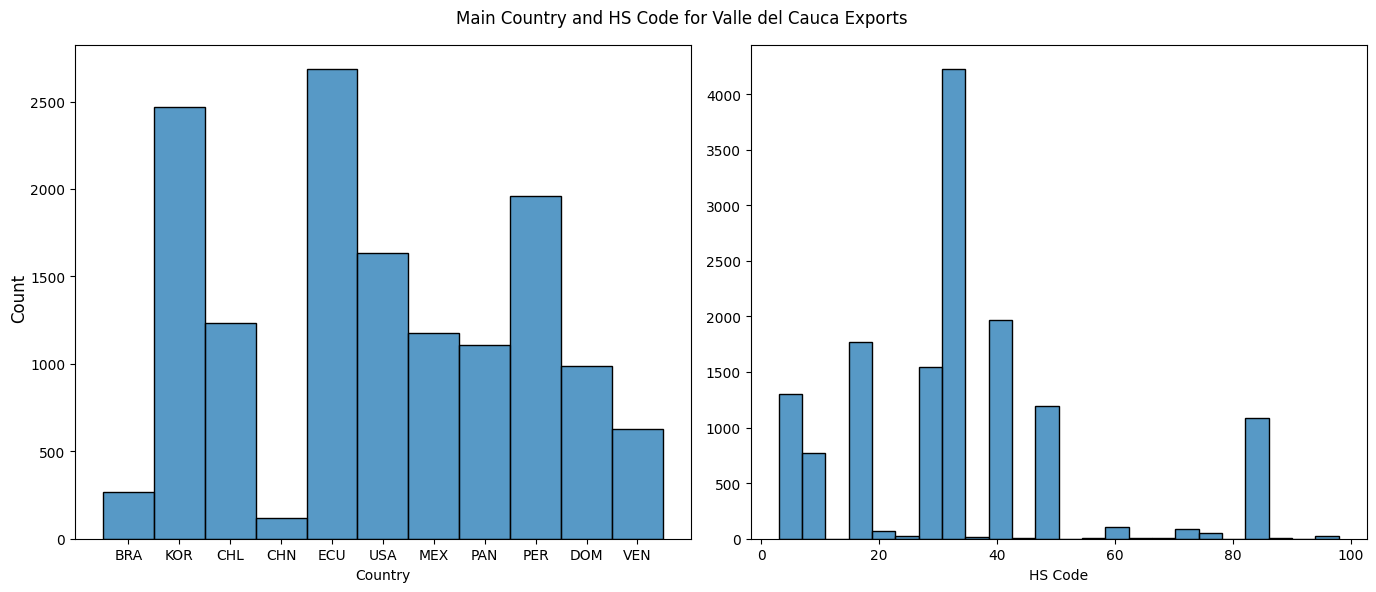

In [5]:
fig, axes = plt.subplots(ncols=2, figsize=(14, 6))
ax1, ax2 = fig.axes

sns.histplot(df, x="COD_PAI4", ax=ax1)
sns.histplot(df, x="POSAR", binwidth=4, ax=ax2)

ax1.set_xlabel("Country")
ax1.set_ylabel("")
ax2.set_xlabel("HS Code")
ax2.set_ylabel("")

fig.suptitle("Main Country and HS Code for Valle del Cauca Exports")
fig.supylabel("Count")

plt.tight_layout()
plt.show()

## Binary Distribution

In [6]:
pivot_df = df.pivot_table(values="FOBPES", index="COD_PAI4", columns="POSAR")

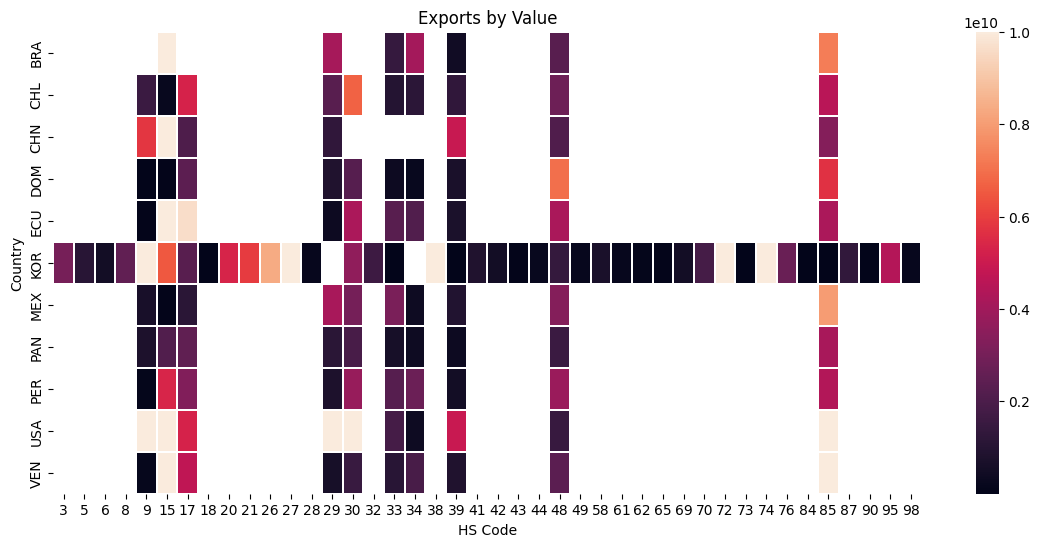

In [13]:
fig, ax = plt.subplots(figsize=(14, 6))

sns.heatmap(pivot_df, vmax=1e10, linewidths=0.2)

ax.set_title("Exports by Value")
ax.set_xlabel("HS Code")
ax.set_ylabel("Country")


plt.show()

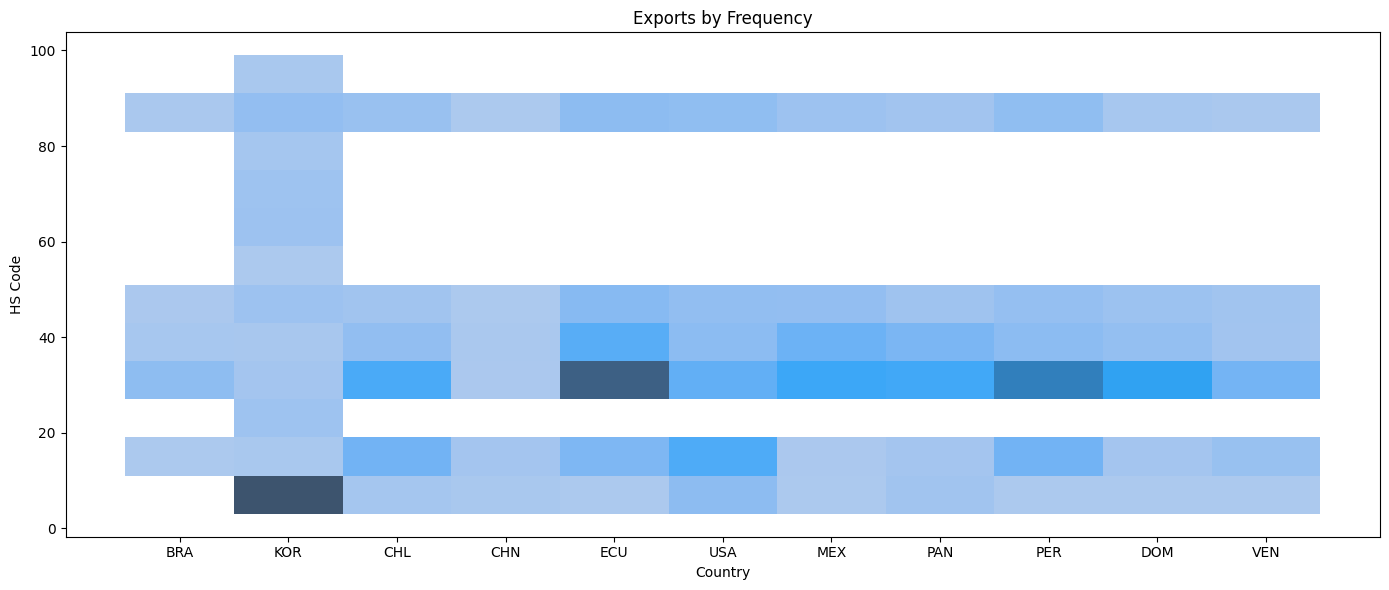

In [12]:
fig, ax = plt.subplots(figsize=(14, 6))

sns.histplot(df, x="COD_PAI4", y="POSAR", binwidth=8)

ax.set_title("Exports by Frequency")
ax.set_xlabel("Country")
ax.set_ylabel("HS Code")

plt.tight_layout()
plt.show()